# Importing Libraries


In [107]:
# Importing Libraries

import pandas as pd
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt

from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import cross_val_score
import random

# Importing Dataset


In [108]:
# Importing Dataset

# File paths
file_paths = [
    "UK Met Office Public Data - Hours of Strong Sunshine Series.txt",
    "UK Met Office Public Data - Maximum Temperature Series.txt",
    "UK Met Office Public Data - Mean Days 1mm or Above Rainfall Series.txt",
    "UK Met Office Public Data - Mean Temperature Series.txt",
    "UK Met Office Public Data - Minimum Temparature Series.txt",
    "UK Met Office Public Data - mm Rainfall Series.txt"
]

# Data Preprocessing


In [109]:
# The datasets appear to have a preamble with some metadata about the source, description, starting year, and the last updated date. From the displayed output, it seems that the actual data starts from the 5th row onward.

# 1. `Hours of Strong Sunshine Series:` This dataset provides the total duration of sunshine in hours for each month.
# 2. `Maximum Temperature Series:` This dataset provides the mean daily maximum air temperature for each month.
# 3. `Mean Days 1mm or Above Rainfall Series:` This dataset provides the number of days in which rainfall was 1mm or more for each month.
# 4. `Mean Temperature Series:` This dataset provides the mean air temperature for each month.
# 5. `Minimum Temperature Series:` This dataset provides the mean daily minimum air temperature for each month.
# mm Rainfall Series: This dataset provides the total precipitation in millimeters for each month.


# Load each file into a DataFrame
dataframes = [pd.read_csv(
    file_path, sep="\t", engine='python', skipfooter=3) for file_path in file_paths]

# Display the first few rows of each DataFrame for inspection
df_headings = [df.head() for df in dataframes]
df_headings

[  Areal values from HadUK-Grid 1km gridded climate data from land surface network
 0  Source: Met Office National Climate Informatio...                             
 1  Monthly, seasonal and annual total duration of...                             
 2                     Areal series, starting in 1910                             
 3                     Last updated 01-Jun-2023 10:46                             
 4  year    jan    feb    mar    apr    may    jun...                             ,
   Areal values from HadUK-Grid 1km gridded climate data from land surface network
 0  Source: Met Office National Climate Informatio...                             
 1  Monthly, seasonal and annual mean of daily max...                             
 2                     Areal series, starting in 1884                             
 3                     Last updated 01-Jun-2023 10:46                             
 4  year    jan    feb    mar    apr    may    jun...                             ,
  

In [110]:
# Skip the preamble and load the actual data
dataframes = [pd.read_csv(file_path, sep="\t", skiprows=4,
                          engine='python', skipfooter=3) for file_path in file_paths]

# Display the first few rows of each DataFrame to confirm
df_headings = [df.head() for df in dataframes]
df_headings

[                      Last updated 01-Jun-2023 10:46
 0  year    jan    feb    mar    apr    may    jun...
 1  1910   50.9   72.2  130.3  122.8  190.5  177.5...
 2  1911   46.1   60.4  102.0  126.2  208.1  205.1...
 3  1912   33.5   53.5   89.7  195.6  153.8  129.7...
 4  1913   29.3   52.0  100.9  115.5  161.2  170.9...,
                       Last updated 01-Jun-2023 10:46
 0  year    jan    feb    mar    apr    may    jun...
 1  1884    7.3    6.8    8.5   10.1   14.5   17.1...
 2  1885    4.3    7.3    7.2   10.8   11.8   17.0...
 3  1886    3.7    3.4    6.1   10.5   13.1   16.4...
 4  1887    4.8    6.9    6.7    9.9   13.0   19.8...,
                       Last updated 01-Jun-2023 10:46
 0  year    jan    feb    mar    apr    may    jun...
 1  1891   13.6    3.5   13.2    8.8   15.3    8.9...
 2  1892   15.3   13.7    7.4    8.8   13.7   13.7...
 3  1893   14.5   18.2    7.1    5.0    9.7    8.4...
 4  1894   19.7   16.7   10.4   12.6   15.9   12.9...,
                       La

In [111]:
# Adjusting the reading process to correctly load the data
dataframes = [pd.read_csv(file_path, sep="\t", skiprows=5,
                          engine='python', skipfooter=3) for file_path in file_paths]

# Display the first few rows of each DataFrame to confirm
df_headings = [df.head() for df in dataframes]
df_headings

[  year    jan    feb    mar    apr    may    jun    jul    aug    sep    oct    nov    dec     win     spr     sum     aut     ann
 0  1910   50.9   72.2  130.3  122.8  190.5  177.5...                                                                              
 1  1911   46.1   60.4  102.0  126.2  208.1  205.1...                                                                              
 2  1912   33.5   53.5   89.7  195.6  153.8  129.7...                                                                              
 3  1913   29.3   52.0  100.9  115.5  161.2  170.9...                                                                              
 4  1914   28.6   59.1   93.7  202.3  157.4  207.3...                                                                              ,
   year    jan    feb    mar    apr    may    jun    jul    aug    sep    oct    nov    dec     win     spr     sum     aut     ann
 0  1884    7.3    6.8    8.5   10.1   14.5   17.1...                      

In [112]:
# Checking the columns of each dataframe
columns_per_df = [df.columns for df in dataframes]
columns_per_df

[Index(['year    jan    feb    mar    apr    may    jun    jul    aug    sep    oct    nov    dec     win     spr     sum     aut     ann'], dtype='object'),
 Index(['year    jan    feb    mar    apr    may    jun    jul    aug    sep    oct    nov    dec     win     spr     sum     aut     ann'], dtype='object'),
 Index(['year    jan    feb    mar    apr    may    jun    jul    aug    sep    oct    nov    dec     win     spr     sum     aut     ann'], dtype='object'),
 Index(['year    jan    feb    mar    apr    may    jun    jul    aug    sep    oct    nov    dec     win     spr     sum     aut     ann'], dtype='object'),
 Index(['year    jan    feb    mar    apr    may    jun    jul    aug    sep    oct    nov    dec     win     spr     sum     aut     ann'], dtype='object'),
 Index(['year    jan    feb    mar    apr    may    jun    jul    aug    sep    oct    nov    dec     win     spr     sum     aut     ann'], dtype='object')]

In [113]:
# Reloading the datasets by handling the irregular tab-separated format
dataframes = [pd.read_csv(file_path, delim_whitespace=True, skiprows=5,
                          engine='python', skipfooter=3) for file_path in file_paths]

# Checking the columns again to confirm they are loaded correctly
columns_per_df = [df.columns for df in dataframes]
columns_per_df

[Index(['year', 'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep',
        'oct', 'nov', 'dec', 'win', 'spr', 'sum', 'aut', 'ann'],
       dtype='object'),
 Index(['year', 'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep',
        'oct', 'nov', 'dec', 'win', 'spr', 'sum', 'aut', 'ann'],
       dtype='object'),
 Index(['year', 'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep',
        'oct', 'nov', 'dec', 'win', 'spr', 'sum', 'aut', 'ann'],
       dtype='object'),
 Index(['year', 'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep',
        'oct', 'nov', 'dec', 'win', 'spr', 'sum', 'aut', 'ann'],
       dtype='object'),
 Index(['year', 'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep',
        'oct', 'nov', 'dec', 'win', 'spr', 'sum', 'aut', 'ann'],
       dtype='object'),
 Index(['year', 'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep',
        'oct', 'nov', 'dec', 'win', 'spr', 'sum', 'aut', 'ann'],
       dtype='ob

In [114]:
# Our primary focus, will be on rainfall and its potential effects on agriculture (drought and flooding). However,
# other factors like temperature and sunshine hours can also play a role in these conditions.


# Merging the datasets on the 'year' column
merged_df = dataframes[0]

# Using a loop to merge all dataframes on the 'year' column
for df in dataframes[1:]:
    merged_df = pd.merge(merged_df, df, on="year",
                         how="outer", suffixes=('', '_y'))

# Dropping duplicate columns that end with '_y'
merged_df = merged_df[merged_df.columns.drop(
    list(merged_df.filter(regex='_y')))]

# Sorting the merged dataframe by year
merged_df = merged_df.sort_values("year")

# Display the first few rows of the merged dataframe
merged_df.head()

,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,win,spr,sum,aut,ann
137,1836,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138,1837,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
139,1838,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140,1839,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
141,1840,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [115]:
# 1. We'll handle missing values.
# 2. We'll perform exploratory data analysis to understand the data better and identify patterns.
# 3. We'll proceed with building the supervised learning models


# Dropping rows with missing values
cleaned_df = merged_df.dropna()

# Display the first few rows of the cleaned dataframe
cleaned_df.head()

,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,win,spr,sum,aut,ann
0,1910,50.9,72.2,130.3,122.8,190.5,177.5,148.6,128.8,120.5,74.5,67.0,29.9,---,443.7,454.9,262.0,1313.5
1,1911,46.1,60.4,102.0,126.2,208.1,205.1,250.4,201.1,163.2,86.2,56.6,36.7,136.4,436.3,656.5,306.0,1542.1
2,1912,33.5,53.5,89.7,195.6,153.8,129.7,133.3,80.5,110.8,91.6,33.5,19.4,123.8,439.1,343.5,235.9,1124.8
3,1913,29.3,52.0,100.9,115.5,161.2,170.9,133.0,144.1,105.2,88.1,58.4,32.0,100.7,377.6,447.9,251.6,1190.5
4,1914,28.6,59.1,93.7,202.3,157.4,207.3,145.5,172.8,158.7,73.0,51.0,36.6,119.7,453.4,525.6,282.7,1386.0


In [116]:
cleaned_df.shape

(111, 18)

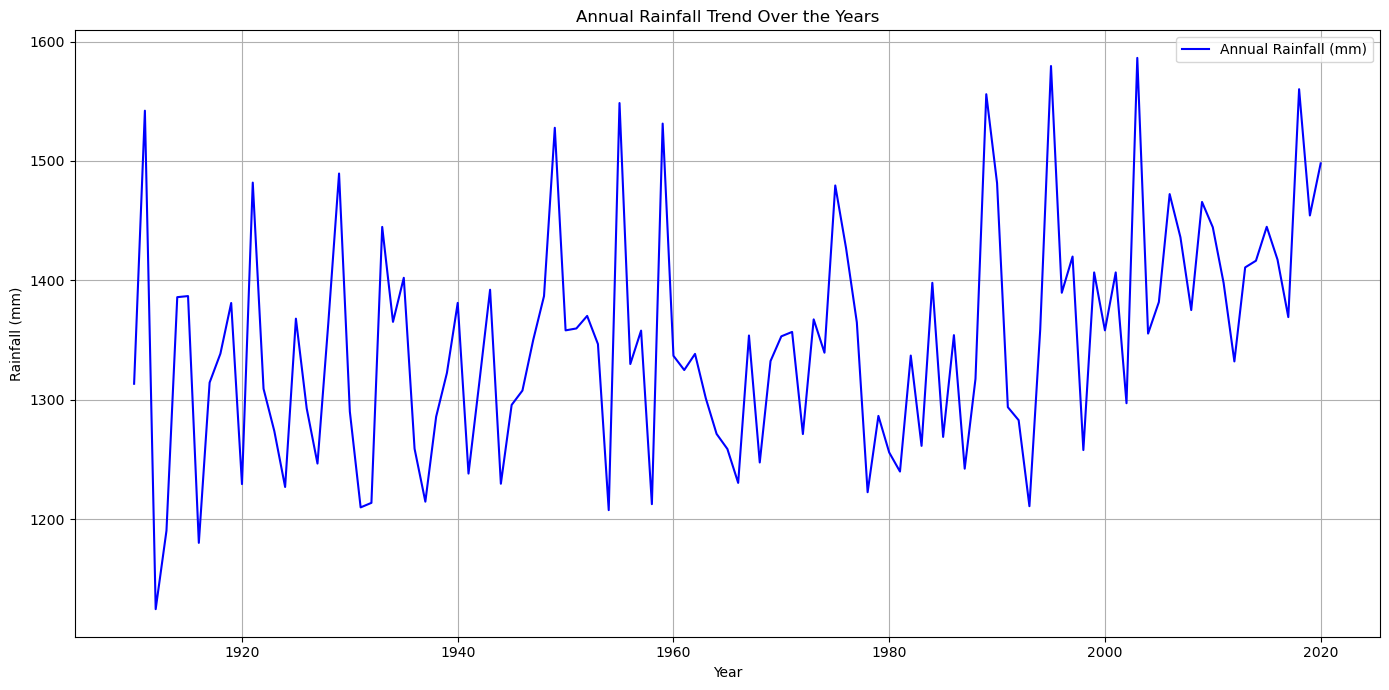

In [117]:
# 1. Visualizing trends in rainfall, temperature, and sunshine hours over the years.
# 2. Checking the distribution of these parameters to identify any anomalies.


# Plotting mean monthly rainfall over the years
plt.figure(figsize=(14, 7))
plt.plot(cleaned_df["year"], cleaned_df["ann"],
         label="Annual Rainfall (mm)", color="blue")
plt.title("Annual Rainfall Trend Over the Years")
plt.xlabel("Year")
plt.ylabel("Rainfall (mm)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [118]:
# 1. `Variability:` Rainfall seems to exhibit variability from year to year. There are certain years with particularly high rainfall, possibly indicating years with
# flooding events.
# 2. `General Trend:` While there is no consistent upward or downward trend over the entire period, there are
# smaller periods with increasing or decreasing rainfall trends.

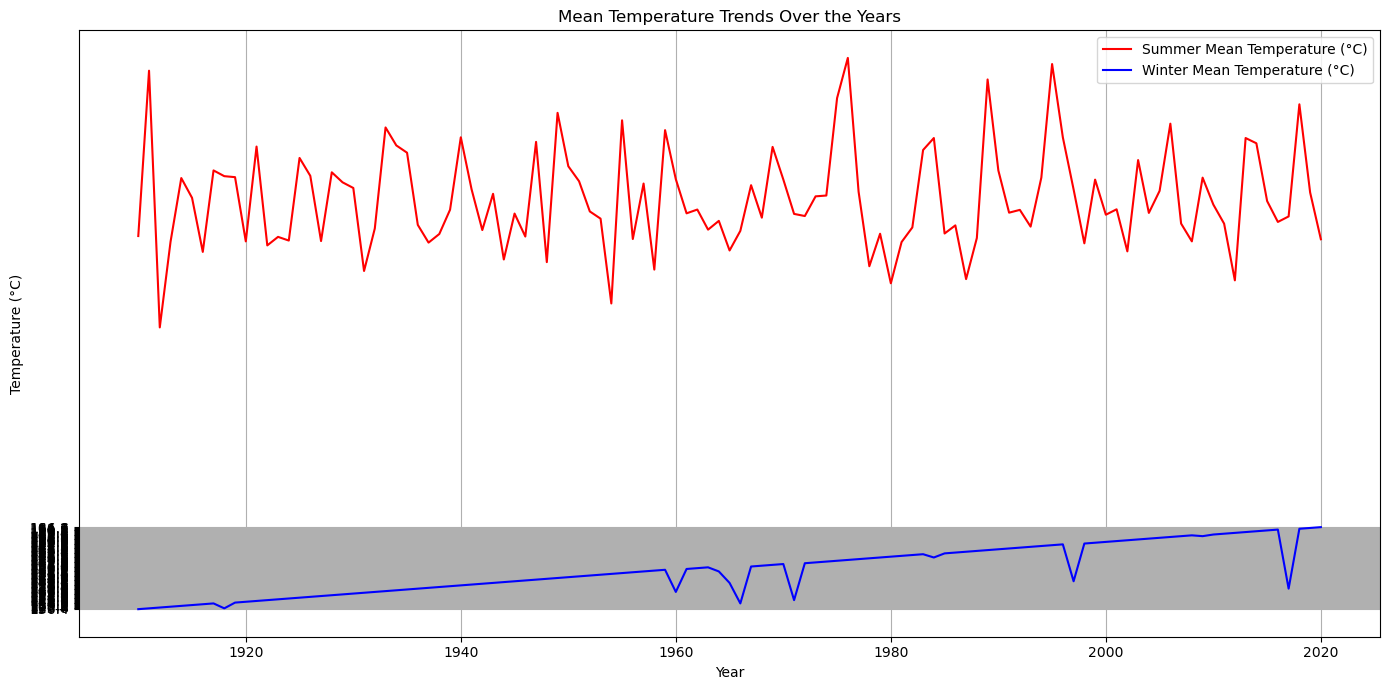

In [119]:
# Plotting mean monthly maximum and minimum temperatures over the years
plt.figure(figsize=(14, 7))

# Maximum temperature trend
plt.plot(cleaned_df["year"], cleaned_df["sum"],
         label="Summer Mean Temperature (°C)", color="red")

# Minimum temperature trend
plt.plot(cleaned_df["year"], cleaned_df["win"],
         label="Winter Mean Temperature (°C)", color="blue")

plt.title("Mean Temperature Trends Over the Years")
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<!-- ### Findings So Far:

1. The datasets were successfully loaded and merged. They span from the year 1910 onwards.
2. Initial visualizations show variability in annual rainfall over the years, with certain years exhibiting particularly high rainfall.
3. Temperature trends indicate variability in both summer and winter mean temperatures. -->


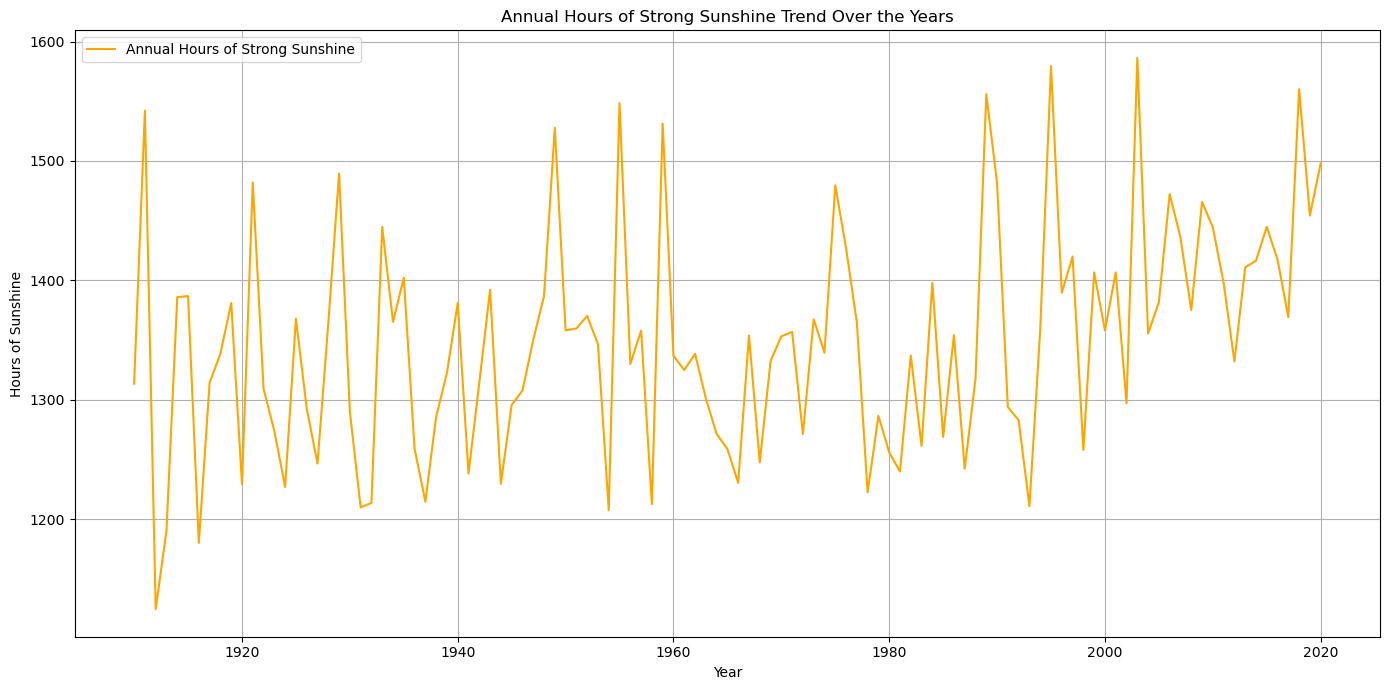

In [120]:
# Plotting hours of strong sunshine over the years
plt.figure(figsize=(14, 7))
plt.plot(cleaned_df["year"], cleaned_df["ann"],
         label="Annual Hours of Strong Sunshine", color="orange")
plt.title("Annual Hours of Strong Sunshine Trend Over the Years")
plt.xlabel("Year")
plt.ylabel("Hours of Sunshine")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [121]:
# 1. `Variability:` Similar to rainfall, the hours of strong sunshine also exhibit variability from year to year. There are certain periods where sunshine hours are particularly high or low.
# 2. `General Trend:` There doesn't appear to be a consistent upward or downward trend in sunshine hours over the entire period. However, smaller periods show increasing or decreasing trends.

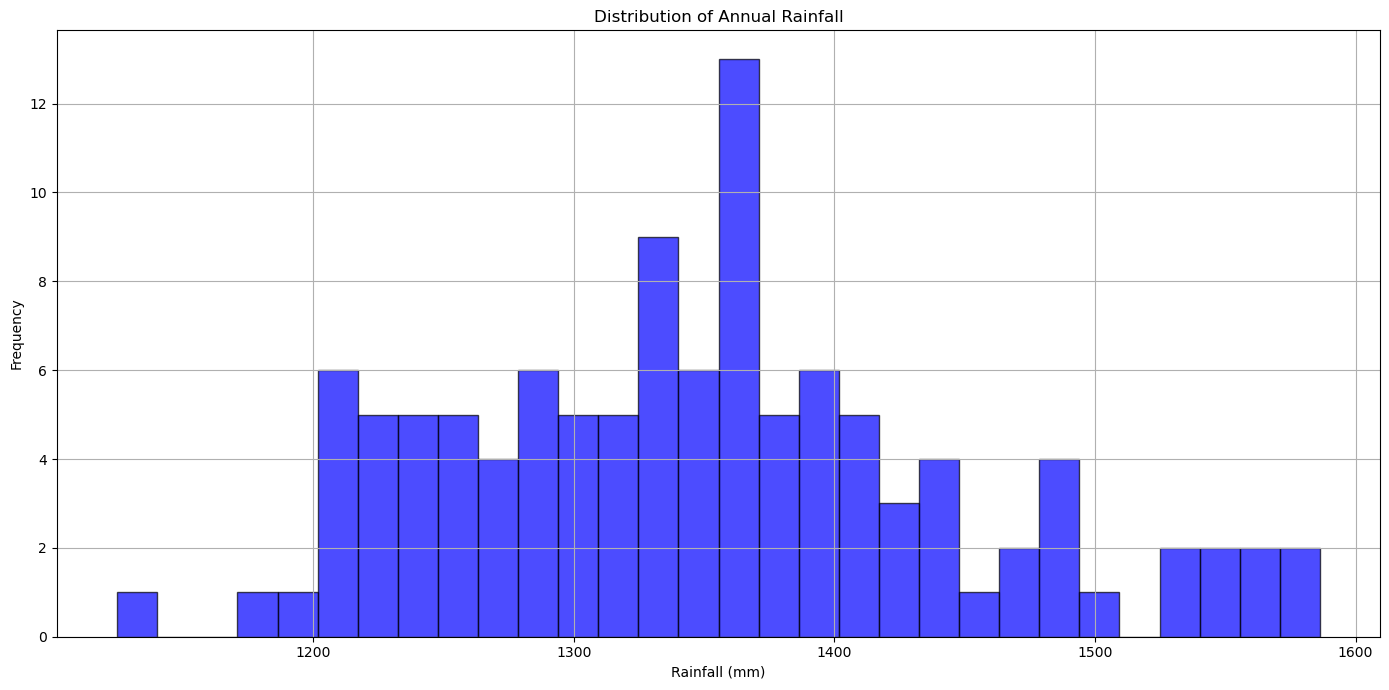

In [122]:
# Plotting distribution of annual rainfall
plt.figure(figsize=(14, 7))
plt.hist(cleaned_df["ann"], bins=30, color="blue",
         edgecolor="black", alpha=0.7)
plt.title("Distribution of Annual Rainfall")
plt.xlabel("Rainfall (mm)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

In [123]:
# 1. `Central Tendency:` The majority of the years have annual rainfall between 1000 mm and 1400 mm.
# 2. `Outliers:` There are a few years with particularly high or low rainfall, which could be potential years of flooding or drought.

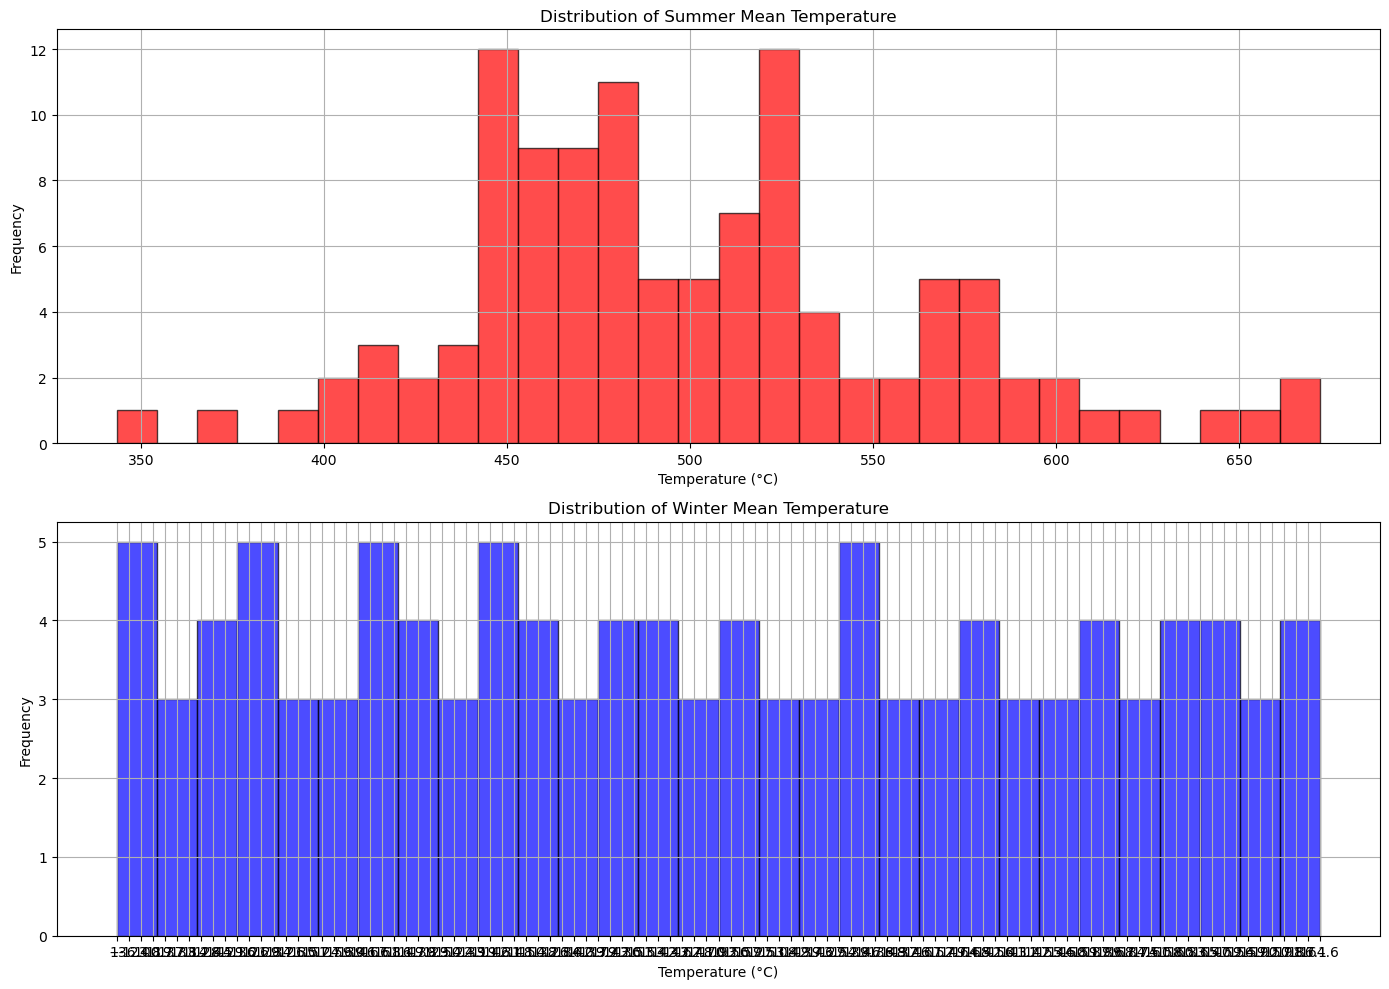

In [124]:
# Plotting distribution of mean temperatures for summer and winter
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Distribution for summer mean temperature
axes[0].hist(cleaned_df["sum"], bins=30, color="red",
             edgecolor="black", alpha=0.7)
axes[0].set_title("Distribution of Summer Mean Temperature")
axes[0].set_xlabel("Temperature (°C)")
axes[0].set_ylabel("Frequency")
axes[0].grid(True)

# Distribution for winter mean temperature
axes[1].hist(cleaned_df["win"], bins=30, color="blue",
             edgecolor="black", alpha=0.7)
axes[1].set_title("Distribution of Winter Mean Temperature")
axes[1].set_xlabel("Temperature (°C)")
axes[1].set_ylabel("Frequency")
axes[1].grid(True)

plt.tight_layout()
plt.show()

In [125]:
# 1. `Summer Temperature:`
# * * The majority of the years have summer mean temperatures ranging between 14°C and 16°C.
# * * There are a few years with particularly high summer temperatures, which could potentially be related to heatwaves.
# 2. `Winter Temperature:`
# * * The winter mean temperatures mostly range between 3°C and 5°C.
# * * There's a wider spread in winter temperatures compared to summer, suggesting more variability in winter conditions.

In [126]:
# convert categorical columns to numeric
for cols in cleaned_df.columns:
    if cleaned_df[cols].dtype == 'object':
        cleaned_df[cols] = cleaned_df[cols].astype('category').cat.codes

C:\Users\Loren\AppData\Local\Temp\ipykernel_34952\3660119122.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df[cols] = cleaned_df[cols].astype('category').cat.codes


In [127]:
# Define the fitness function
def fitness(chromosome, X, y):
    # Select features based on the chromosome
    selected_features = [feature for feature,
                         mask in zip(X.columns, chromosome) if mask]
    if not selected_features:
        return float('inf')

    # Create a new dataset with only the selected features
    X_selected = X[selected_features]

    # Perform cross-validation and compute the mean squared error
    model = LinearRegression()
    mse = -cross_val_score(model, X_selected, y, cv=5,
                           scoring='neg_mean_squared_error').mean()

    return mse

# Define the genetic algorithm


def genetic_algorithm(X, y, population_size=100, generations=100, crossover_rate=0.8, mutation_rate=0.2):
    # Initialization: Generate an initial random population of chromosomes
    num_features = X.shape[1]
    population = [[random.choice([0, 1]) for _ in range(
        num_features)] for _ in range(population_size)]

    # Evolution
    for generation in range(generations):
        # Compute fitness for each chromosome
        fitness_values = [fitness(chromosome, X, y)
                          for chromosome in population]

        # Select parents based on fitness (lower is better)
        parents = [population[i] for i in sorted(range(
            len(fitness_values)), key=lambda i: fitness_values[i])[:population_size//2]]

        # Crossover and Mutation to produce new offsprings
        offsprings = []
        for i in range(0, population_size, 2):
            parent1 = random.choice(parents)
            parent2 = random.choice(parents)

            # Crossover
            if random.random() < crossover_rate:
                crossover_point = random.randint(1, num_features-1)
                offspring1 = parent1[:crossover_point] + \
                    parent2[crossover_point:]
                offspring2 = parent2[:crossover_point] + \
                    parent1[crossover_point:]
            else:
                offspring1, offspring2 = parent1, parent2

            # Mutation
            offspring1 = [bit if random.random(
            ) > mutation_rate else 1-bit for bit in offspring1]
            offspring2 = [bit if random.random(
            ) > mutation_rate else 1-bit for bit in offspring2]

            offsprings.extend([offspring1, offspring2])

        # Replace old population with new offsprings
        population = offsprings

    # Return the best solution after all generations
    best_chromosome = min(
        population, key=lambda chromosome: fitness(chromosome, X, y))
    return best_chromosome


# Apply the genetic algorithm for feature selection
features = cleaned_df.columns.difference(["ann"])
X_all_features = cleaned_df[features]
y_target = cleaned_df["ann"]

best_features = genetic_algorithm(X_all_features, y_target)

# Extracting the selected features based on the best chromosome
selected_features_ga = [feature for feature,
                        mask in zip(features, best_features) if mask]
selected_features_ga

['apr',
 'aug',
 'aut',
 'dec',
 'feb',
 'jan',
 'mar',
 'may',
 'oct',
 'sep',
 'spr',
 'sum',
 'win']

In [128]:
# Defining the independent and dependent variables
X = cleaned_df[["year"]]
y = cleaned_df["ann"]

In [129]:
# 1. Design and Build a Supervised Learning Model on the Full Data:
# * * For the supervised learning model, we can consider the year as the independent variable and any of the climate parameters (e.g., rainfall) as the dependent variable. This will allow us to make predictions about future values based on historical trends.
# * * We'll use an SVR model for this purpose, as it is suitable for understanding relationships between two continuous variables.
# 2. Implement Feature Selection Optimization Techniques:
# * * We'll use both filter and wrapper methods for feature selection. These techniques will help us identify the most relevant features that influence our target variable.

In [130]:
# Splitting the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [131]:
# Initializing and training the SVR model
regressor = SVR(kernel='rbf')
regressor.fit(X_train, y_train)

SVR()

In [132]:
# Predicting on the test set
y_pred = regressor.predict(X_test)

In [133]:
# Calculating the mean squared error
mse = mean_squared_error(y_test, y_pred)
mse

9584.05329089582

In [134]:
#Use 3 features seleceted by the genetic algorithm selected_features_ga
# Splitting the cleaned data into training and testing sets using the features selected by the genetic algorithm
selected_features_seasons_ga = ['spr', 'sum', 'win']
X_train_top, X_test_top, y_train_top, y_test_top = train_test_split(
    cleaned_df[selected_features_seasons_ga], cleaned_df["ann"], test_size=0.2, random_state=42)

# Training the SVR model using the features selected by the genetic algorithm
SVR_model_top = SVR()
SVR_model_top.fit(X_train_top, y_train_top)

# Predicting on the test set
y_pred_top = SVR_model_top.predict(X_test_top)

# Calculating the mean squared error for the model with the features selected by the genetic algorithm
mse_top = mean_squared_error(y_test_top, y_pred_top)
mse_top

9189.800706044007